# 1. Apply a multiple linear regression on the given dataset

## Variable list
- M: percentage of males aged 14-24
- So: whether it is in a Southern state. 1 for Yes, 0 for No.
- Ed: mean years of schooling
- Po1: police expenditure in 1960
- Po2: police expenditure in 1959
- LF: labour force participation rate
- M.F: number of males per 1000 females
- Pop: state population
- NW: number of non-whites resident per 1000 people
- U1: unemployment rate of urban males aged 14-24
- U2: unemployment rate of urban males aged 35-39
- GDP: gross domestic product per head
- Ineq: income inequality
- Prob: probability of imprisonment
- Time: average time served in prisons
- y: crime rate in an unspecified unit region (target)

In [114]:
# packages and data import
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import t, f, chi2, skew, kurtosis
%matplotlib inline
data=pd.read_csv('https://drive.google.com/uc?export=download&id=1ssBNxmds4zmmJbAHzJUB0_UyyfyMtoHT')

(1) Find the top 5 input variables that show the high linear correlation with the target based on the correlation coefficient. 

In [115]:
df = pd.DataFrame(data)
corr = df.corr(method = 'pearson')
cor2y = np.abs(corr.loc['y'])
cor22y = cor2y.sort_values()
print(cor22y.tail(6))

Pop     0.337474
Prob    0.427422
GDP     0.441320
Po2     0.666714
Po1     0.687604
y       1.000000
Name: y, dtype: float64


(2) Draw pairwise scatter plot – one scatter plot illustrates the relationship between the input variable selected in Question (1) and output target 

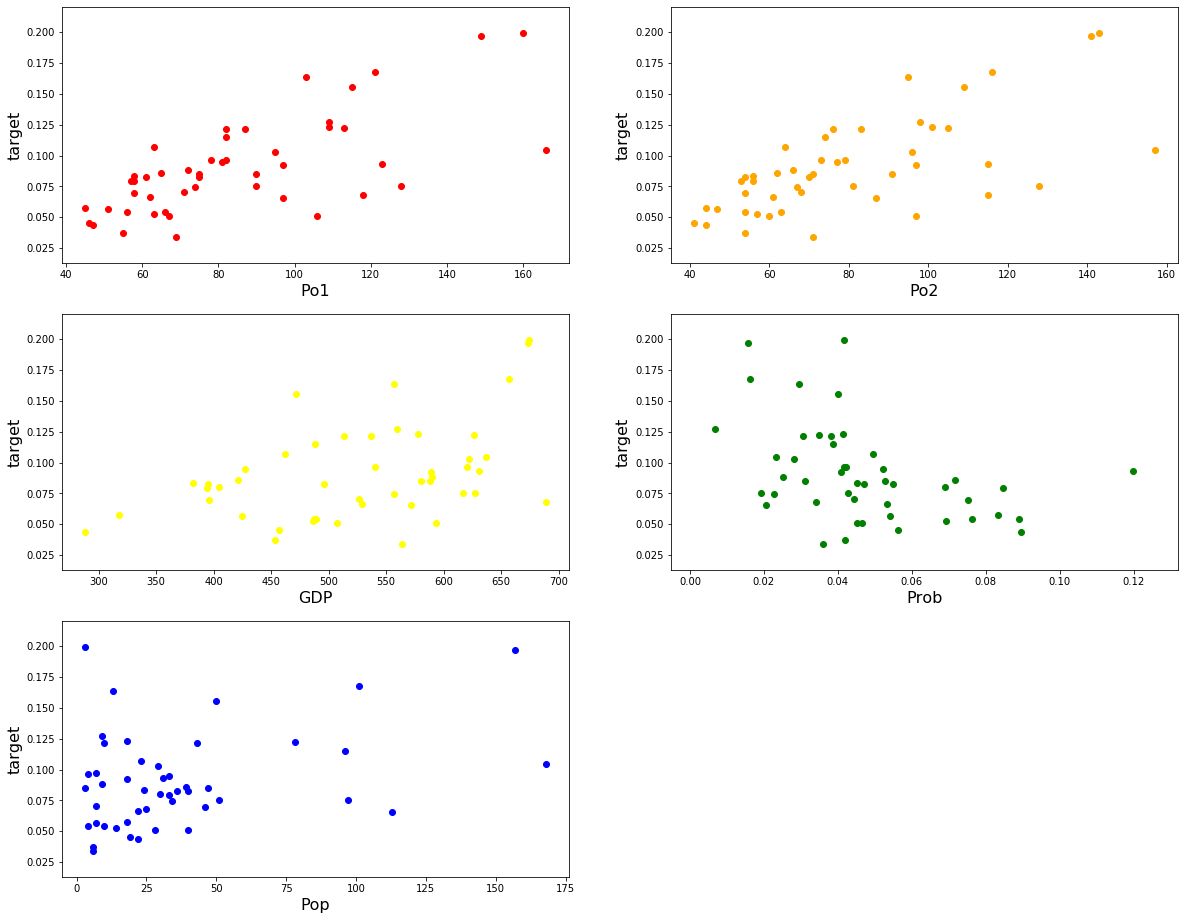

In [107]:
fig=plt.figure(figsize=(20,16))
plt.subplot(321)
plt.scatter(df['Po1'], df['y'], color = "red")
plt.xlabel('Po1' , fontsize = 16)
plt.ylabel('target', fontsize = 16)
plt.subplot(322)
plt.scatter(df['Po2'], df['y'], color = "orange")
plt.xlabel('Po2' , fontsize = 16)
plt.ylabel('target', fontsize = 16)
plt.subplot(323)
plt.scatter(df['GDP'], df['y'], color = "yellow")
plt.xlabel('GDP' , fontsize = 16)
plt.ylabel('target', fontsize = 16)
plt.subplot(324)
plt.scatter(df['Prob'], df['y'], color = "green")
plt.xlabel('Prob' , fontsize = 16)
plt.ylabel('target', fontsize = 16)
plt.subplot(325)
plt.scatter(df['Pop'], df['y'], color = "blue")
plt.xlabel('Pop' , fontsize = 16)
plt.ylabel('target', fontsize = 16)
plt.show()


(3) Train a linear regression model (M1) using the selected variables in Question (1) and fill the following table. 

In [119]:
reg = LinearRegression()
X = data[['Po1','Po2','GDP','Prob' , 'Pop']].values
Y = data[['y']].values
reg.fit(X, Y)
coef = reg.coef_
intercept = reg.intercept_

print('intercept : ',intercept)
print('coef_ : ',coefficient)
n,p = X.shape

X = np.c_[np.ones(n) , X]
XtX = np.matmul(X.T , X)
inv_XtX = np.linalg.inv(XtX)

beta = np.matmul(np.matmul(inv_XtX,X.T),Y)

y_pred = np.matmul(X, beta).flatten()
y_true = data['y'].values

SSE = np.sum((y_pred)-Y)**2 
MSE = SSE / (n-p-1)

seB = np.sqrt(MSE*np.diag(inv_XtX))
print('seB : ', seB)


t=beta.flatten()/seB
print('t : ', t)

pvalues=(1-t.cdf(np.abs(t) , n-p-1))*2

intercept :  [0.09228757]
coef_ :  [ 2.62474439e-03 -1.49015707e-03 -1.53743853e-04 -4.13347529e-01
 -1.38774123e-04]
seB :  [1.61520861e-12 5.61215819e-14 5.98816810e-14 3.48427590e-15
 1.01052330e-11 6.02049949e-15]
t :  [ 5.71366244e+10  4.67688954e+10 -2.48850240e+10 -4.41250511e+10
 -4.09043045e+10 -2.30502674e+10]


AttributeError: 'numpy.ndarray' object has no attribute 'cdf'

(4) Calculate VIF for the variables of M1. Given that multicollinearity is severe when there is a variable with a VIF value of greater than 10, find the most reasonable way to get a better model based on the calculated VIF values.  

In [120]:
r2 = reg.score(data[['Po1','Po2','GDP','Prob' , 'Pop']] , data['y'])

y_true=data['y'].values
y_pred = reg.predict(data[['Po1','Po2','GDP','Prob' , 'Pop']])

SSE = sum((y_true - y_pred)**2)
SST = sum((y_true - np.mean(y_true))**2)
SSR = SST -SSE

n, p = data[['Po1','Po2','GDP','Prob', 'Pop']].shape
adj_r2 = 1 - ((n-1) / (n-p-1))*(1-r2)

vif_1 = []
reg.fit(data[['Po2','GDP','Prob' , 'Pop']] ,data['Po1'])
r2_1 = reg.score(data[['Po2','GDP','Prob' , 'Pop']] ,data['Po1'])
vif_1.append(1/(1-r2_1))

reg.fit(data[['Po1','GDP','Prob' , 'Pop']] ,data['Po2'])
r2_2 = reg.score(data[['Po1','GDP','Prob' , 'Pop']] ,data['Po2'])
vif_1.append(1/(1-r2_2))

reg.fit(data[['Po1','Po2','Prob' , 'Pop']] ,data['GDP'])
r2_3 = reg.score(data[['Po1','Po2','Prob' , 'Pop']] ,data['GDP'])
vif_1.append(1/(1-r2_3))

reg.fit(data[['Po1','Po2','GDP' , 'Pop']] ,data['Prob'])
r2_4 = reg.score(data[['Po1','Po2','GDP' , 'Pop']] ,data['Prob'])
vif_1.append(1/(1-r2_4))

reg.fit(data[['Po1','Po2','GDP' , 'Prob']] ,data['Pop'])
r2_5 = reg.score(data[['Po1','Po2','GDP' , 'Prob']] ,data['Pop'])
vif_1.append(1/(1-r2_5))

arr1 = pd.DataFrame(data = vif_1 , index= ['Po1','Po2','GDP','Prob', 'Pop'], columns=['VIF_1'])

print(arr1)

vif_2 = []
reg.fit(data[['GDP','Prob','Pop']] ,data['Po1'])
r2_1 = reg.score(data[['GDP','Prob','Pop']] ,data['Po1'])
vif_2.append(1/(1-r2_1))

reg.fit(data[['Po1','Prob','Pop']] ,data['GDP'])
r2_2 = reg.score(data[['Po1','Prob','Pop']] ,data['GDP'])
vif_2.append(1/(1-r2_2))

reg.fit(data[['Po1','GDP','Pop']] ,data['Prob'])
r2_3 = reg.score(data[['Po1','GDP','Pop']] ,data['Prob'])
vif_2.append(1/(1-r2_3))

reg.fit(data[['Po1','GDP','Prob']] ,data['Pop'])
r2_4 = reg.score(data[['Po1','GDP','Prob']] ,data['Pop'])
vif_2.append(1/(1-r2_4))

arr2 = pd.DataFrame(data = vif_2 , index= ['Po1','GDP','Prob', 'Pop'], columns=['VIF_2'])

print(arr2)

          VIF_1
Po1   80.348322
Po2   80.975316
GDP    3.264732
Prob   1.524780
Pop    1.517425
         VIF_2
Po1   3.438328
GDP   3.187330
Prob  1.524200
Pop   1.512607


(5) Based on the way you provide in Question (4), train a new regression model (M2) and fill the following table. 

In [121]:
reg = LinearRegression()
X = data[['Po1','GDP','Prob' , 'Pop']].values
Y = data[['y']].values
reg.fit(X, Y)
coefficient= reg.coef_
intercept = reg.intercept_
print('intercept : ',intercept)
print('coef_ : ',coefficient)

n,p = X.shape

X = np.c_[np.ones(n) , X]
XtX = np.matmul(X.T , X)
inv_XtX = np.linalg.inv(XtX)

beta = np.matmul(np.matmul(inv_XtX,X.T),Y)

y_pred = np.matmul(X, beta).flatten()
y_true = data['y'].values

SSE = np.sum((y_pred)-Y)**2 
MSE = SSE / (n-p-1)

seB = np.sqrt(MSE*np.diag(inv_XtX))
print('seB : ', seB)


t=beta.flatten()/seB
print('t : ', t)

pvalues=(1-t.cdf(np.abs(t) , n-p-1))*2

intercept :  [0.09580457]
coef_ :  [[ 1.25836611e-03 -1.67094553e-04 -4.18254557e-01 -1.30331717e-04]]
seB :  [3.79525428e-13 2.73839634e-15 8.12051231e-16 2.38311393e-12
 1.41782647e-15]
t :  [ 2.52432546e+11  4.59526655e+11 -2.05768487e+11 -1.75507579e+11
 -9.19236024e+10]


AttributeError: 'numpy.ndarray' object has no attribute 'cdf'

(7) Apply the F-test on M1 and M2 and explain the results. In addition, fill the following tables

In [122]:

X1 = data[['Po1','Po2','GDP','Prob' , 'Pop']].values
Y1 = data[['y']].values

n1,p1 = X1.shape
X1 = np.c_[np.ones(n1) , X1]
XtX1 = np.matmul(X1.T , X1)
inv_XtX1 = np.linalg.inv(XtX1)

beta1 = np.matmul(np.matmul(inv_XtX1,X1.T),Y1)

y1_pred = np.matmul(X1, beta1).flatten()
y1_true = data['y'].values

SST1 = np.sum((y1_true - np.mean(y1_true))**2)
SSE1 = np.sum((y1_true - y1_pred)**2)
SSR1 = np.sum((y1_pred -  np.mean(y1_true))**2)

MSR1 = SSR1 / p1
MSE1 = SSE1 / (n1-p1-1)
MST1 = MSR1 + MSE1

Fo1 = MSR1/MSE1

seB1 = np.sqrt(MSE1*np.diag(inv_XtX1))
t1=beta1.flatten()/seB1

pvalues1=(1-t.cdf(np.abs(t1) , n1-p1-1))*2


X2 = data[['Po1','GDP','Prob' , 'Pop']].values
Y2 = data[['y']].values

n2,p2 = X2.shape
X2 = np.c_[np.ones(n2) , X2]
XtX2 = np.matmul(X2.T , X2)
inv_XtX2 = np.linalg.inv(XtX2)

beta2 = np.matmul(np.matmul(inv_XtX2,X2.T),Y2)

y2_pred = np.matmul(X2, beta2).flatten()
y2_true = data['y'].values

SST2 = np.sum((y2_true - np.mean(y2_true))**2)
SSE2 = np.sum((y2_true - y2_pred)**2)
SSR2 = np.sum((y2_pred -  np.mean(y2_true))**2)

MSR2 = SSR2 / p2
MSE2 = SSE2 / (n2-p2-1)
MST2 = MSR2 + MSE2

Fo2 = MSR2/MSE2

seB2 = np.sqrt(MSE2*np.diag(inv_XtX2))
t2=beta2.flatten()/seB2

pvalues2=(1-t.cdf(np.abs(t2) , n2-p2-1))*2

arr1 = np.array(['Factor', 'Sum of square', 'Mean square' , 'F-value' , 'p-Value'],
                ['Model', SSR1, p1, MSR1, Fo1 , pvalues1] , 
                ['Residual', SSE1 , n1-p1-1, MSE1, Null, Null],
                ['Total', SST1, n1-1, Null, Null, Null])
print(arr1)

arr2  = np.array(['Factor', 'Sum of square', 'Mean square' , 'F-value' , 'p-Value'],
                ['Model', SSR2, p2, MSR2, Fo2 , pvalues2] , 
                ['Residual', SSE2 , n2-p2-1, MSE1, Null, Null],
                ['Total', SST2, n2-1, Null, Null, Null])

print(arr2)

AttributeError: 'numpy.ndarray' object has no attribute 'cdf'

(8) Calculate R^2 and adjusted R^2 for M1 and M2. Then, compare two models. 

In [124]:
reg=LinearRegression()

reg.fit(data[['Po1','Po2','GDP','Prob' , 'Pop']], data['y'])
r2_1 = reg.score(data[['Po1','Po2','GDP','Prob' , 'Pop']], data['y'])

y1_true = data['y'].values
y1_pred=reg.predict(data[['Po1','Po2','GDP','Prob' , 'Pop']])
n1,p1 = data[['Po1','Po2','GDP','Prob' , 'Pop']].shape

adj_r2_1 = 1-((n1-1)/(n1-p1-1))*(1-r2_1)


reg.fit(data[['Po1','GDP','Prob' , 'Pop']], data['y'])
r2_2 = reg.score(data[['Po1','GDP','Prob' , 'Pop']], data['y'])

y2_true = data['y'].values
y2_pred=reg.predict(data[['Po1','GDP','Prob' , 'Pop']])
n2,p2 = data[['Po1', 'GDP','Prob' , 'Pop']].shape

adj_r2_2 = 1-((n2-1)/(n2-p2-1))*(1-r2_2)

arr = np.array(['Null', 'R^2' , 'adjusted R^2'],
        ['M1', r2_1, adj_r2_1],
        ['M2', r2_2, adj_r2_2])

print(r2_2)
print(adj_r2_2)

print(arr)


ValueError: only 2 non-keyword arguments accepted

(9) Calculate residuals of M1 and draw scatter plots to show relationship between one of the input variables and residuals. 

(10) Do residuals of M1 and M2 follow the normal distribution based on the Jarque–Bera test? (significance level is 0.05). 

(11) Do residuals of M1 and M2 satisfy homoskedasticty based on the Breusch–Pagan test? (significance level is 0.05) 

# 2. Logistic regression

Using the MAGIC Gamma Telescope data set, build a classifier through logistic regression.

The included variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)
    - g is treated as class 1 while h is treated as class 0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

# data partition
trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)

(1) Using MAGIC Gamma Telescope data set, calculate accuracy with varying cutoff for the final decision. cutoff ∈{0.1,0.15,0.2,0.25,…,0.95}. Draw a line plot (x=cutoff, y=accuracy). For this problem, the model is trained using trnX and accuracy is calculated using valX.